### KAGGLE House Prices-Advanced Regression Techniques

From the site:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1564]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
color=sns.color_palette()
sns.set_style('darkgrid')
import warnings
from scipy import stats 
from sklearn.metrics import r2_score
from scipy.stats import norm,skew #for some statistics
from sklearn.linear_model import LinearRegression
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn #ignore any warning from sklearn and seaborn 

In [1565]:
train=pd.read_csv('train.csv')

In [1566]:
train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [1567]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1568]:
test=pd.read_csv('test.csv')

In [1569]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1570]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


### Data Processing

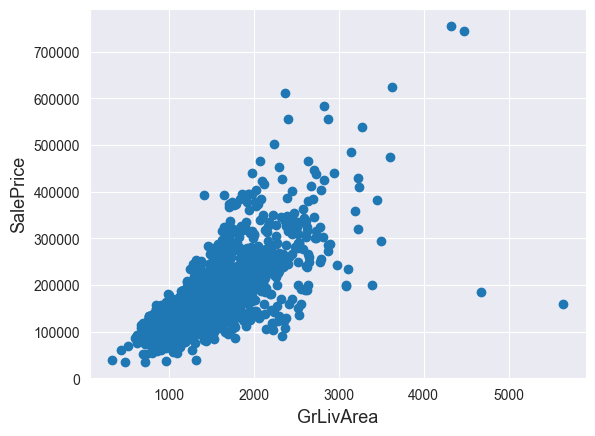

In [1571]:
'''Outliers'''
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

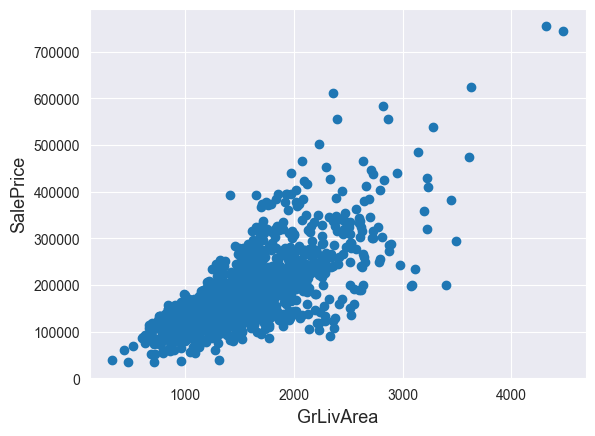

In [1572]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


Note :

Outliers removal is note always safe. We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. You can refer to the modelling part of this notebook for that.



 mu = 2.57 and sigma = 0.03



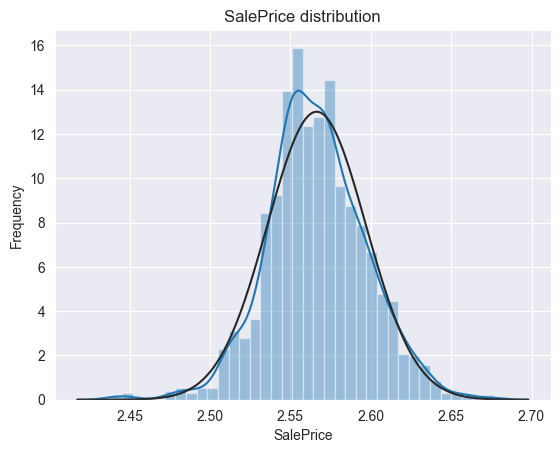

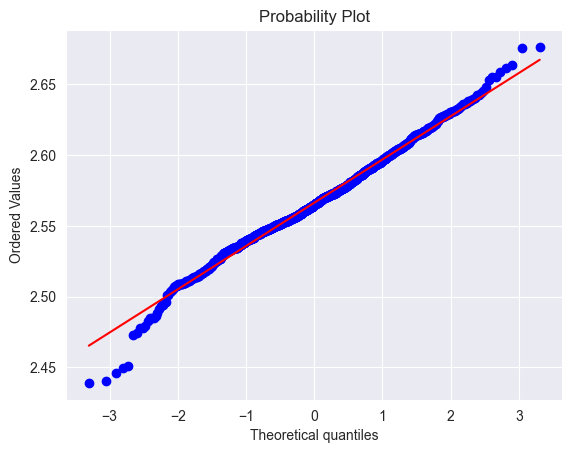

In [1619]:
'''Target Variable : SalePrices'''
sns.distplot(train['SalePrice'] , fit=norm)
inline_rc = dict(mpl.rcParams)
import matplotlib as mpl
import matplotlib.pyplot as plt
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()



The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Log-transformation of the target variable


 mu = 2.57 and sigma = 0.03



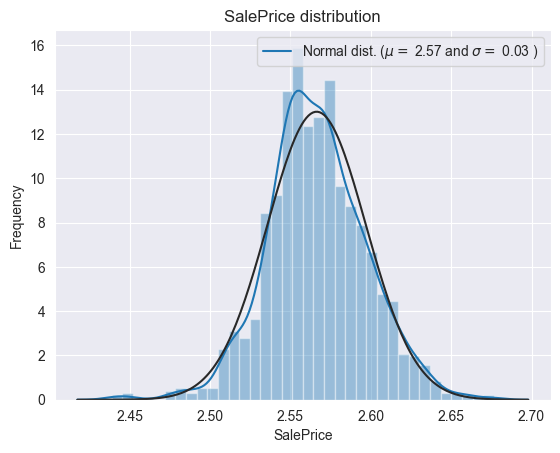

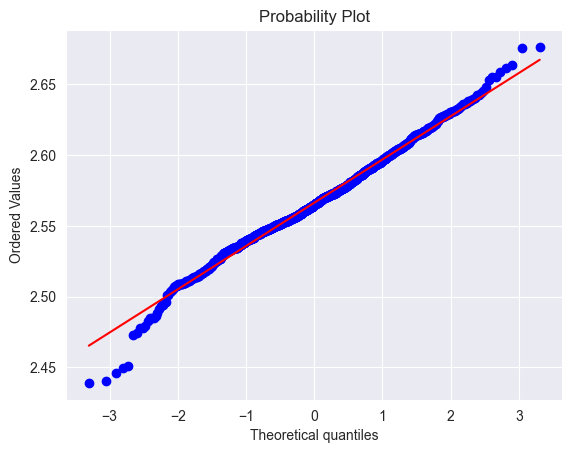

In [1616]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.grid=(False)
plt.show()



The skew seems now corrected and the data appears more normally distributed.

### Features engineering

let's first concatenate the train and test data in the same dataframe

In [1575]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice']
print(np.shape(np.array(y_train)))
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

(1458,)
all_data size is : (2917, 79)


### Missing Data

In [1576]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

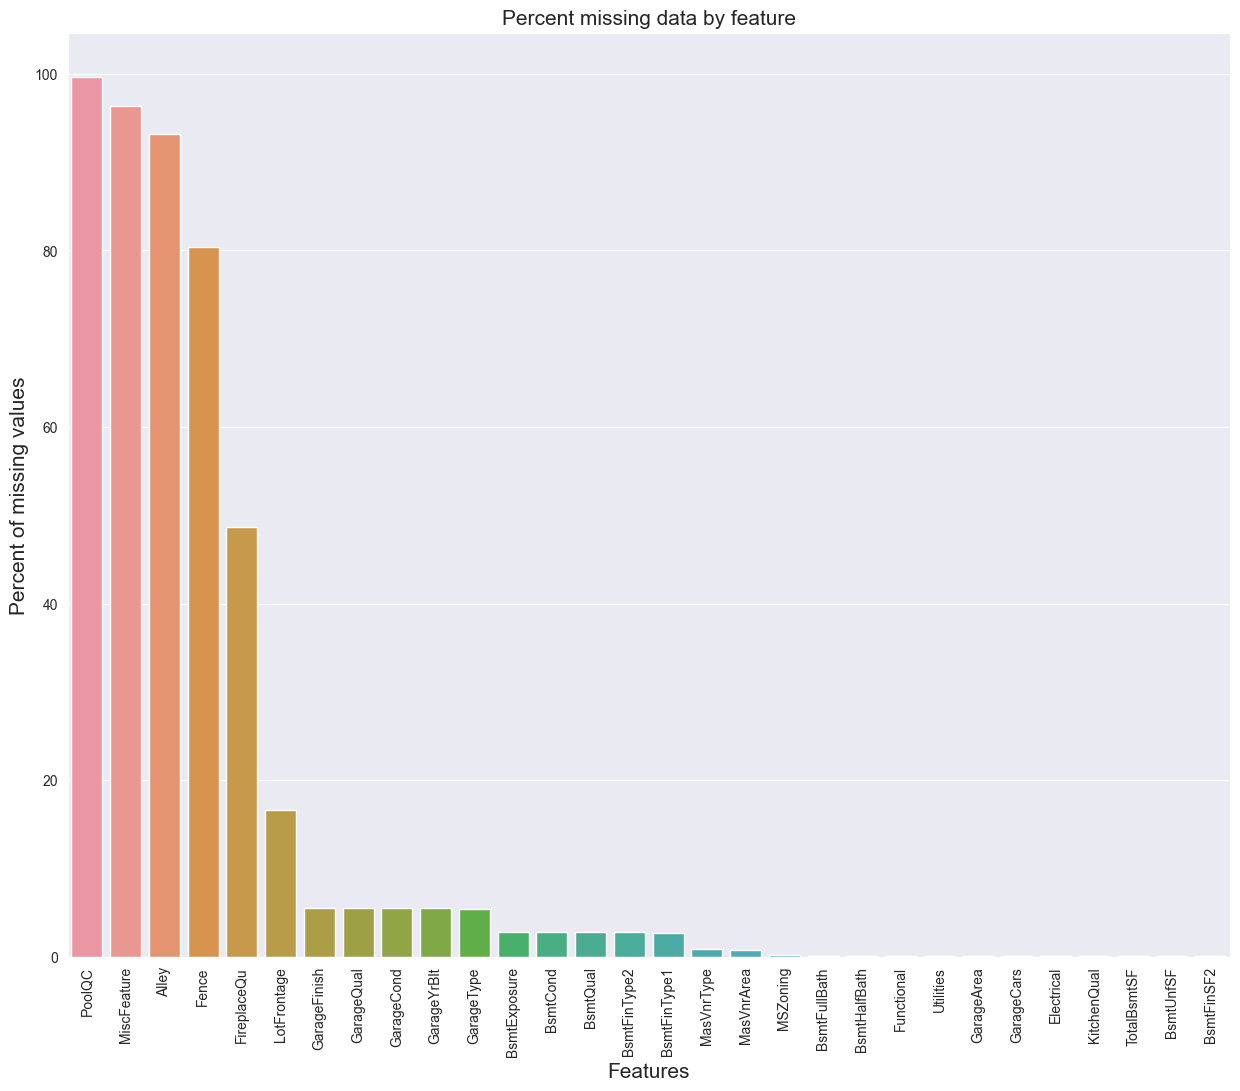

In [1577]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)



Data Correlation


<AxesSubplot:>

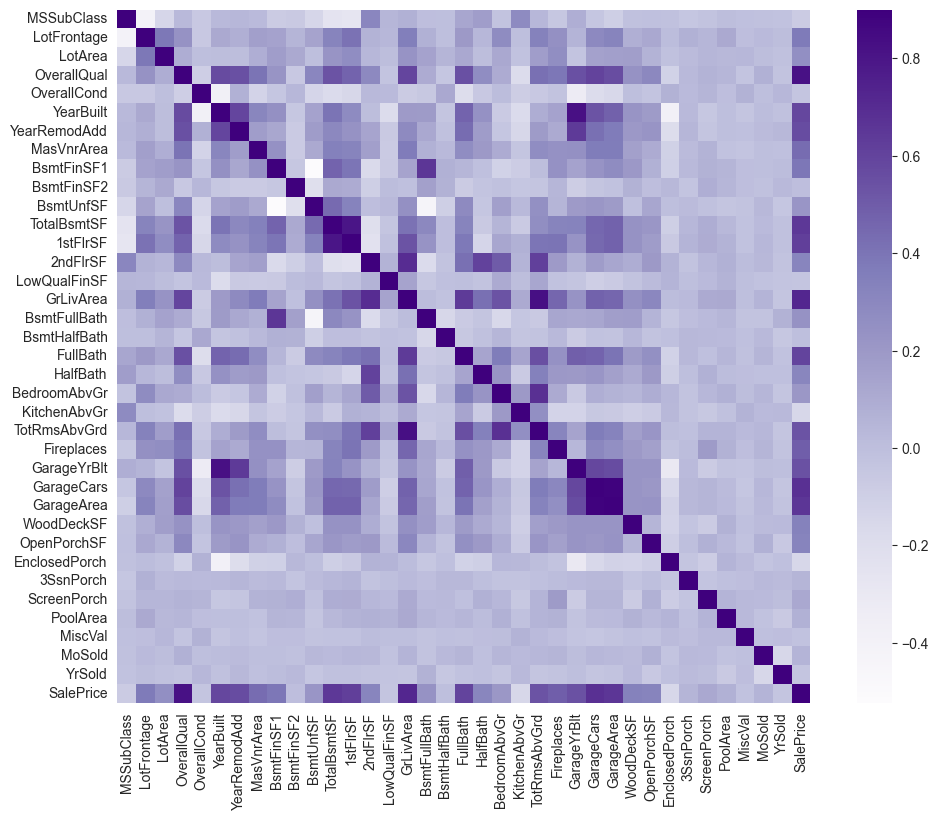

In [1578]:

#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap='Purples')


Imputing missing values

We impute them by proceeding sequentially through features with missing values

    PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.



In [1579]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

MiscFeature : data description says NA means "no misc feature"

In [1580]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Alley : data description says NA means "no alley access"

In [1581]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Fence : data description says NA means "no fence"

In [1582]:
all_data["Fence"] = all_data["Fence"].fillna("None")

FireplaceQu : data description says NA means "no fireplace"

In [1583]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


    LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [1584]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [1585]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [1586]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)



    BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement



In [1587]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [1588]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 

In [1589]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)



    MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'



In [1590]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [1591]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional : data description says NA means typical

In [1592]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [1593]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [1594]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [1595]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [1596]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [1597]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")



Is there any remaining missing value ?


Is there any remaining missing value ?


In [1598]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [1599]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information

In [1600]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)




Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house


In [1604]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data2=all_data
a=1
print(all_data.columns[a])
print(list(all_data.iloc[:,a]))
#MSSubClass 1-10


MSZoning
['RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'C (all)', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'FV', 'RM', 'RL', 'RL', 'RM', 'RM', 'RL', 'RL', 'RL', 'FV', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RM', 'RL', 'RM', 'RL', 'RM', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'FV', 'C (all)', 'RL', 'RL', 'RL', 'RL', 'C (all)', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'FV', 'RM', 'RM', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'FV', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RM', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RL', 'RM', 'RM', 'RM', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'RL', 'RM', 'RL', 'RL', 'RL', 'FV', 'RL', 'RL', 'RL', 'RL

Skewed features

In [1605]:


numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

all_data.shape


Skew in numerical features: 



(2917, 79)

Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x

.

Note that setting λ=0

is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

In [1606]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [1608]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.000000,...,0.0,1.540963,1.820334,None,0.000000,1.820334,1.194318,WD,Normal,14.976591
1,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.000000,...,0.0,1.540963,1.820334,None,0.000000,2.440268,0.730463,WD,Normal,14.923100
2,2.885846,RL,5.914940,20.347241,0.730463,0.730463,0.000000,Lvl,Inside,0.000000,...,0.0,1.540963,1.820334,None,0.000000,3.011340,1.194318,WD,Normal,15.149678
3,3.011340,RL,5.684507,19.691553,0.730463,0.730463,0.000000,Lvl,Corner,0.000000,...,0.0,1.540963,1.820334,None,0.000000,1.820334,0.000000,WD,Abnorml,14.857121
4,2.885846,RL,6.314735,21.325160,0.730463,0.730463,0.000000,Lvl,FR2,0.000000,...,0.0,1.540963,1.820334,None,0.000000,1.540963,1.194318,WD,Normal,15.852312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,1.194318,RM,3.932510,14.081426,0.730463,0.730463,1.540963,Lvl,Inside,0.000000,...,0.0,1.540963,1.820334,None,0.000000,2.602594,0.000000,WD,Normal,13.567978
2913,1.194318,RM,3.932510,14.013314,0.730463,0.730463,1.540963,Lvl,Inside,0.000000,...,0.0,1.540963,1.820334,None,0.000000,2.259674,0.000000,WD,Abnorml,13.567978
2914,2.055642,RL,7.620056,22.782058,0.730463,0.730463,1.540963,Lvl,Inside,0.000000,...,0.0,1.540963,1.820334,None,0.000000,3.011340,0.000000,WD,Abnorml,14.824355
2915,3.340760,RL,5.744420,20.046557,0.730463,0.730463,1.540963,Lvl,Inside,0.000000,...,0.0,1.540963,1.194318,Shed,11.147538,2.750250,0.000000,WD,Normal,13.993617


Getting dummy categorical features

In [1615]:
all_data = pd.get_dummies(all_data)
print(all_data.dtypes)

k=0
cat_features=[i for i in all_data.columns if all_data.dtypes[i]=='uint8']
print(len(cat_features))

MSSubClass               float64
LotFrontage              float64
LotArea                  float64
Street                   float64
Alley                    float64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 220, dtype: object
161


In [ ]:
ytest2=pd.read_csv('sample_submission.csv')['SalePrice']

In [ ]:
train=all_data[:ntrain]
test=all_data[ntrain:]

In [ ]:
train22=all_data[:ntrain]
train22['sales']=y_train
train22.iloc[:,-1]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    11.344519
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
Name: sales, Length: 1458, dtype: float64

In [ ]:

train

y_train.to_csv('regressionytrain.csv')

In [ ]:
print(list(y_train)[1298])

12.323860125621126


In [ ]:
train22.iloc[0,220]

12.24769911637256

In [ ]:
from numpy.linalg import eig

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
# Apply the same scaling to both datasets
train_standardized = scaler.fit_transform(train)
w2,v2=eig(np.dot(np.transpose(train_standardized),train_standardized))
print(len(w2))
print(max(w2))
print(min(w2))
print(max(w2)/min(w2))
data={'eigenvalue':w2}
eigen=pd.DataFrame(data)
eigen.describe()

for i in range(len(w2)):
    if w2[i]<0:
        w2[i]=100


220
(21007.00387909322+0j)
(-2.230445599325408e-12+0j)
(-9418299144102296-0j)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
print(len(w2))
print(max(w2))
print(min(w2))
print(max(w2)/min(w2))
data={'eigenvalue':w2}
eigen=pd.DataFrame(data)
eigen.describe()
print(w2)


220
(21007.00387909322+0j)
(1.7927333909245774e-13+0j)
(1.1717862781737528e+17+0j)
[2.10070039e+04+0.00000000e+00j 1.04565017e+04+0.00000000e+00j
 9.41026504e+03+0.00000000e+00j 7.13673740e+03+0.00000000e+00j
 5.91567339e+03+0.00000000e+00j 5.67433906e+03+0.00000000e+00j
 5.30859979e+03+0.00000000e+00j 5.00422401e+03+0.00000000e+00j
 4.95010961e+03+0.00000000e+00j 4.43926555e+03+0.00000000e+00j
 4.11385162e+03+0.00000000e+00j 4.05045980e+03+0.00000000e+00j
 3.93350495e+03+0.00000000e+00j 3.84167964e+03+0.00000000e+00j
 3.63900925e+03+0.00000000e+00j 3.61645804e+03+0.00000000e+00j
 3.47821106e+03+0.00000000e+00j 3.42973768e+03+0.00000000e+00j
 3.34560952e+03+0.00000000e+00j 3.20752168e+03+0.00000000e+00j
 3.16500902e+03+0.00000000e+00j 3.06129359e+03+0.00000000e+00j
 3.01805600e+03+0.00000000e+00j 2.96249336e+03+0.00000000e+00j
 2.93142512e+03+0.00000000e+00j 2.83927869e+03+0.00000000e+00j
 2.78744796e+03+0.00000000e+00j 2.75476088e+03+0.00000000e+00j
 2.73021289e+03+0.00000000e+00j 2.6

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


#### Modelling 

##### Import librairies

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import math as m 
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv('myFileName.csv')
train=data.iloc[:,0:-2]
y_train=data.iloc[:,221]



### Ridge Regression :

In [ ]:
reg=Ridge()
LinearR=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(train,y_train,test_size=0.3,random_state=2)
linears_regressor = LinearRegression().fit(xtrain, ytrain)
ridge_regressor= Ridge().fit(xtrain,ytrain)
linear_train_accuracy = linears_regressor.score(xtrain, ytrain)
linear_test_accuracy = linears_regressor.score(xtest, ytest)
ridge_train_accuracy = ridge_regressor.score(xtrain, ytrain)
ridge_test_accuracy = ridge_regressor.score(xtest, ytest)
pred1=linears_regressor.predict(xtest)
pred2=ridge_regressor.predict(xtest)
LinearError=mean_squared_error(ytest,pred1,squared=False)
RidgeError=mean_squared_error(ytest,pred2,squared=False)
print('Ridge error:',RidgeError)
print('Linear error:',LinearError)




Ridge error: 1.0756752515006751
Linear error: 1.0714379677963182


In [ ]:
reg=Ridge()
LinearR=LinearRegression()
linears_regressor = LinearRegression().fit(train, y_train)
ridge_regressor= Ridge().fit(train,y_train)
pred1=linears_regressor.predict(test)
pred2=ridge_regressor.predict(test)
LinearError=mean_squared_error(ytest2,pred1,squared=False)
RidgeError=mean_squared_error(ytest2,pred2,squared=False)
print('Ridge error:',RidgeError)
print('Linear error:',LinearError)

Ridge error: 179943.93494948078
Linear error: 179934.9359841195


In [ ]:
data=pd.read_csv('myFileName.csv')
data.columns
train=data.iloc[:,:-2]
y=data.iloc[:,-1]
train.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(train,y_train,test_size=0.3,random_state=2)



xtrain


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
293,0.741137,0.554956,1.201715,0.064305,0.077199,-1.397892,-0.23228,0.692443,1.238290,0.198136,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,-0.117975,0.466092
532,0.741137,0.305086,-0.032464,0.064305,0.077199,-1.397892,-0.23228,1.299555,-0.456726,1.081182,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,-0.117975,0.466092
798,0.741137,0.514428,0.653965,0.064305,0.077199,-1.397892,3.68864,0.017006,-0.456726,0.853219,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,-0.117975,0.466092
1134,0.568246,0.554956,0.080830,0.064305,0.077199,0.741385,-0.23228,0.017006,-0.456726,-0.695216,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,3.661506,-0.052468,-0.091129,-0.117975,-2.144024
915,-0.317412,-0.127697,1.262155,0.064305,0.077199,0.741385,-0.23228,-1.626158,0.451113,-0.495789,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,-0.117975,0.466092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,-0.317412,0.751434,0.280789,0.064305,0.077199,0.741385,-0.23228,0.692443,-0.456726,-0.032474,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,-0.117975,0.466092
299,-0.317412,0.554956,0.838028,0.064305,0.077199,0.741385,-0.23228,0.017006,1.935042,-0.695216,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,8.470578,-2.144024
493,-0.317412,0.128890,-0.286421,0.064305,0.077199,0.741385,-0.23228,-0.746091,0.451113,-0.363127,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,-0.091129,-0.117975,0.466092
527,-0.317412,0.128890,2.703222,0.064305,0.077199,-1.397892,-0.23228,0.017006,-2.871959,-0.462602,...,-0.058682,-0.058682,-0.299598,-0.045423,0.388438,-0.272924,-0.052468,10.965887,-0.117975,-2.144024


In [ ]:
xtrain.to_csv('regressiontrain.csv')
ytrain.to_csv('regressiontraintarget.csv')

xtest.to_csv('regressiontest.csv')
ytest.to_csv('regressiontesttarget.csv')

In [ ]:
import plotly.express as px 
reg=Ridge(alpha=1.0,fit_intercept=False)
LinearR=LinearRegression(fit_intercept=False)
lassoR=Lasso(alpha=1.0,fit_intercept=False)
elastic=ElasticNet(alpha=1.0,l1_ratio=0.5,fit_intercept=False)

#linear regression
LinearR2=LinearR.fit(xtrain,ytrain)
Y_pred=LinearR2.predict(xtest)
LinearError=mean_squared_error(ytest,Y_pred,squared=True)
error1=np.subtract(ytest,Y_pred)**2
coeff1=LinearR2.coef_
#Ridge
RidgeR=reg.fit(xtrain,ytrain)
Y_predRidge=RidgeR.predict(xtest)
RidgeError=mean_squared_error(ytest,Y_predRidge,squared=True)
error2=np.subtract(ytest,Y_predRidge)**2
coeff2=RidgeR.coef_
#lasso
LassoR2=lassoR.fit(xtrain,ytrain)
Y_predLasso=LassoR2.predict(xtest)
LassoError=mean_squared_error(ytest,Y_predLasso,squared=True)
error3=np.subtract(ytest,Y_predLasso)**2
coeff3=LassoR2.coef_
#elastic-net
ElasticR=elastic.fit(xtrain,ytrain)
Y_predElastic=ElasticR.predict(xtest)
ElasticError=mean_squared_error(ytest,Y_predElastic,squared=True)
error4=np.subtract(ytest,Y_predElastic
                   )**2
coeffs4=ElasticR.coef_
fig = px.bar(x=["Linear","Lasso","Ridge","Elastic-net"], 
             y=[2.132421354,LassoError,RidgeError,ElasticError],
             title="Mean squared errors",
             labels={"y": "Error","x": "Regression method"})
fig.add_hline(y=min([LinearError,LassoError,RidgeError]))
fig.show()

In [ ]:
xtrain=xtrain.drop(xtrain.index[[146,147,148,149,150,151,152]])
ytrain=ytrain.drop(ytrain.index[[146,147,148,149,150,151,152]])

293     0.857942
532    -3.613437
798     0.120860
1134   -1.228823
915    -3.881036
          ...   
466     0.003866
299    -0.126747
493    -0.182577
527    -1.655432
1192   -0.026258
Name: sales, Length: 1014, dtype: float64

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
lassoR=Lasso(alpha=0.07,fit_intercept=False)
elastic=ElasticNet(alpha=0.57,l1_ratio=0.08,fit_intercept=False)
errorRidge=[]
errorLinear=[]
errorLasso=[]
errorElasticNet=[]
for i in range(1,218):
    alpha=i
    FeatureVariable=xtrain.iloc[:,0:i]
    TargetVariable=ytrain
    lasso_regressor2=lassoR.fit(FeatureVariable,TargetVariable)
    elas_regressor2=elastic.fit(FeatureVariable,TargetVariable)
    pred3=lasso_regressor2.predict(xtest.iloc[:,0:i])
    pred4=elas_regressor2.predict(xtest.iloc[:,0:i])
    errorLasso.append(mean_squared_error(ytest,pred3))
    errorElasticNet.append(mean_squared_error(ytest,pred4))

In [ ]:
errorBackward=[1.0273592, 1.0005165, 0.9896104, 0.9896104, 0.9896104, 0.9896103, 0.9896103, 0.9257211, 0.9257211
  ,0.9266526, 0.9266526, 0.9238117, 0.9238117, 0.9222152, 0.9218537, 0.9218537, 0.9218537, 0.9206559
  ,0.9206559, 0.9183920, 0.9183920, 0.9183920, 0.9183920, 0.9183920, 0.9211870, 0.9243221, 0.9355162
  ,0.9355162, 0.9185960, 0.9091564, 0.9091564, 0.9185960, 0.9185960, 0.9185960, 0.9091564, 0.9056590
  ,0.9056590, 0.9056590, 0.9039254, 0.9039254, 0.9039254, 0.9039254, 0.9039254, 0.9039254, 0.9039254
  ,0.9039254, 0.9112239, 0.9112239, 0.9112239, 0.9112239, 0.9112239, 0.9112239, 0.9112239, 0.9062367
  ,0.9062367, 0.9031762, 0.9031762, 0.9031762, 0.9080884, 0.9021777, 0.9179312, 0.9179312, 0.9103049
  ,0.9103049, 0.9037652, 0.9037652, 0.9037652, 0.9037652, 0.9037652, 0.9037652, 0.9037652, 0.9085219
  ,0.9085219, 0.8994919, 0.8994919, 0.8994919, 0.8994919, 0.8994919, 0.8994919, 0.8994919, 0.8905175
  ,0.8905175, 0.8905175, 0.9068516, 0.8905175, 0.8905175, 0.8905175, 0.8905175, 0.8905175, 0.8988725
  ,0.8864081, 0.8864081, 0.8886565, 0.8886565, 0.8886565, 0.8783058, 0.8970696, 0.8970696, 0.8970696
  ,0.8970696, 0.8966295, 0.8966295, 0.8966295, 0.8966295, 0.8966295, 0.8913633, 0.8913633, 0.8959129
  ,0.8959129, 0.8801624, 0.8801624, 0.8801624, 0.8801624, 0.8801624, 0.8801624, 0.8801624, 0.8858002
  ,0.8858002, 0.8858002, 0.8858002, 0.8858002, 0.8858002, 0.8430203, 0.8430203, 0.8638170, 0.8638170
  ,0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170
  ,0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170, 0.8638170
  ,0.8430203, 0.8430203, 0.8994830, 0.8483138, 0.8483138, 0.8483138, 0.8483138, 0.8483138, 0.8483138
  ,0.8483138, 0.8483138, 0.8483138, 0.8483138, 0.8483138, 0.8375236, 0.8375236, 0.8375236, 0.8375236
  ,0.8591961, 0.8591961, 0.8395819, 0.8395819, 0.8303454, 0.8527982, 0.8527982, 0.8527982, 0.8421605
  ,0.8421605, 0.8421605, 0.8421605, 0.8318136, 0.8318136, 0.8126680, 0.8126680, 0.8126680, 0.8649437
  ,0.8649437, 0.8649437, 0.8649437, 0.8639079, 0.8841513, 0.8841513, 0.8841513, 0.8841513, 0.8352709
  ,0.8352709, 0.8514428, 0.8514428, 0.8514428, 0.8651605, 0.8651605, 0.8474857, 0.8095723, 0.8114609
  ,0.8173242, 0.8173242, 0.8092970, 0.7994979, 0.8173242, 0.8173242, 0.8173242, 0.8173242, 0.8173242
  ,0.8570497, 0.8570497, 0.8288505, 0.8570497, 0.8570497, 0.8570497, 0.8570497, 0.8570497, 0.8570497
  ,0.8570497]

errorForward=[1.0245325, 1.0005165, 0.9896104, 0.9896104, 0.9896104, 0.9896103, 0.9896103, 0.9255992, 0.9255992,
  0.9263063, 0.9263063, 0.9241728, 0.9241728, 0.9224415, 0.9219897, 0.9219897, 0.9219897, 0.9204998,
  0.9204998, 0.9184890, 0.9184890, 0.9184890, 0.9184890, 0.9184890, 0.9176294, 0.9202349, 0.9217006,
  0.9217006, 0.9217006, 0.9217006, 0.9217006, 0.9217006, 0.9217006, 0.9217006, 0.9217006, 0.9217006,
  0.9217006, 0.9217006, 0.9187107, 0.9187107, 0.9187107, 0.9187107, 0.9038288, 0.9038288, 0.9038288,
  0.9038288, 0.9038288, 0.9038288, 0.9038288, 0.9038288, 0.9038288, 0.9038288, 0.9038288, 0.9038288,
  0.9038288, 0.9038288, 0.9038288, 0.9038288, 0.9136266, 0.9251823, 0.9251823, 0.9251823, 0.9244241,
  0.9244241, 0.9153339, 0.9153339, 0.9153339, 0.9153339, 0.9153339, 0.9153339, 0.9153339, 0.9152404,
  0.9152404, 0.9072436, 0.9072436, 0.9072436, 0.9072436, 0.9072436, 0.9072436, 0.9072436, 0.9060429,
  0.9058511, 0.9058511, 0.9058511, 0.9058511, 0.9058511, 0.9058511, 0.9058511, 0.9058511, 0.9034946,
  0.9008518, 0.9008518, 0.9008518, 0.9008518, 0.9008518, 0.9008518, 0.8926922, 0.8926922, 0.8926922,
  0.8926922, 0.8924933, 0.8924933, 0.8924933, 0.8855164, 0.8855164, 0.8855164, 0.8734027, 0.8734027,
  0.8734027, 0.8719641, 0.8719641, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568,
  0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568,
  0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568,
  0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568,
  0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568, 0.8719568,
  0.8719568, 0.8719568, 0.8716110, 0.8716110, 0.8716110, 0.8716110, 0.8716110, 0.8716110, 0.8712185,
  0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8677120,
  0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8677120, 0.8670068, 0.8670068, 0.8670068, 0.8664769,
  0.8664769, 0.8664769, 0.8664769, 0.8647900, 0.8647900, 0.8647900, 0.8647900, 0.8647900, 0.8585250,
  0.8585250, 0.8567199, 0.8567199, 0.8610744, 0.8564671, 0.8564671, 0.8564671, 0.8564671, 0.8597248,
  0.8563241, 0.8563241, 0.8563241, 0.8566291, 0.8566291, 0.8578948, 0.8578948, 0.8578948, 0.8578948,
  0.8578948, 0.8578948, 0.8578948, 0.8578948, 0.8670458, 0.8670458, 0.8604486, 0.8604486, 0.8604486,
  0.8604486]
stepwise=[
 1.0245325 ,1.0245325 ,1.0245325 ,1.0217055 ,1.0217055 ,1.0211653 ,1.0211653 ,0.9276234, 0.9276234,
 0.9276234 ,0.9276234 ,0.9276234 ,0.9304607 ,0.9304607 ,0.9304607 ,0.9304607 ,0.9304607, 0.9304607,
 0.9304607 ,0.9304607 ,0.9304607 ,0.9304607 ,0.9304607 ,0.9304607 ,0.9304607 ,0.9304607, 0.9304607,
 0.9304607 ,0.9475541 ,0.9475541 ,0.9475541 ,0.9475541 ,0.9475541 ,0.9475541 ,0.9475541, 0.9475541,
  0.9475541, 0.9525220, 0.9475541, 0.9475541, 0.9475541, 0.9525220, 0.9525220, 0.9525220, 0.9525220,
  0.9525220, 0.9525220, 0.9525220, 0.9525220, 0.9525220, 1.0245325, 0.8905400, 0.890540, 0.8905400,
 0.8905400 ,0.8905400 ,0.8905400 ,0.8905400 ,0.8905400 ,0.8905400 ,0.8905400 ,0.8905400, 0.8887044,
 0.8887044 ,0.8887044 ,0.8052589 ,0.8855400 ,0.8967952 ,0.8967952 ,0.9402631 ,0.9402631, 0.9402631,
 0.9402631 ,0.9402631 ,0.9402631 ,0.9402631 ,0.9402631 ,0.9402631 ,0.9402631 ,0.9402631, 0.8206305,
 0.9262634 ,0.9262634 ,0.7912063 ,0.7912063 ,0.7912345 ,0.7912345 ,0.7912345 ,0.7931887, 0.7931887,
 0.8156421 ,0.8156421 ,0.8156421 ,0.8205219 ,0.8063053 ,0.8044540 ,0.8044540 ,0.8044540, 0.8141730,
 0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806, 0.8188806,
 0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806 ,0.8188806, 0.8188806,
 0.8188806 ,0.8188806 ,0.8107565 ,0.8107565 ,0.8107565 ,0.8107565 ,0.8107565 ,0.8107565, 0.7995883,
0.8035670 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8296590,
0.8296590 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8296590 ,0.8098511 ,0.8098511 ,0.8098511 ,0.8098511,
 0.8098511 ,0.8098511, 0.8111942, 0.8111942, 0.8111942, 0.8111942 ,0.8111942 ,0.8111942 ,0.8015003,
 0.8121740 ,0.8121740 ,0.8121740, 0.8121740, 0.8121740 ,0.8121740 ,0.8121740 ,0.8121740 ,0.8121740,
 0.8121740 ,0.7999789 ,0.7999789 ,0.7999789, 0.7999789 ,0.7890007 ,0.7890007 ,0.7890007 ,0.7890007,
 0.7890007 ,0.8285729 ,0.8299544 ,0.8299544, 0.8299544 ,0.8299544 ,0.8100317 ,0.8100317 ,0.8105241,
 0.8105241 ,0.8105241 ,0.8105241 ,0.8105241, 0.8105241 ,0.8105241 ,0.8105241 ,0.8105241 ,0.7831927,
 0.7831927 ,0.7831927 ,0.7831927 ,0.7831927, 0.7831927 ,0.8045961 ,0.8045961 ,0.8045961 ,0.8045961,
 0.8045961 ,0.8105328 ,0.8105328 ,0.8105328, 0.8105328 ,0.8105328 ,0.8105328 ,0.8105328 ,0.8105328,
 0.8105328 ,0.8105328 ,0.8105328 ,0.8105328, 0.8004345 ,0.8004345 ,0.8004345 ,0.8029902 ,0.8029902,
 0.8029902]

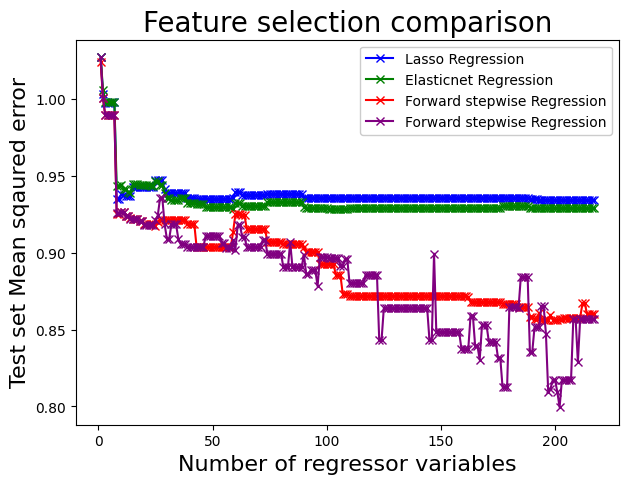

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))#figure and axes object(s) with size (10,10)
plt.plot([1*i for i in range(1,218)], errorLasso,marker='x', color='blue',label='Lasso Regression')
"plt.plot([2*i for i in range(1,510)], errorLasso, color='red',label='Lasso Regression')"
plt.plot([1*i for i in range(1,218)], errorElasticNet,marker='x',color='green',label='Elasticnet Regression')
plt.plot([1*i for i in range(1,218)], errorForward,color='red',marker='x',label='Forward stepwise Regression')
plt.plot([1*i for i in range(1,218)], errorBackward,color='purple',marker='x',label='Forward stepwise Regression')
plt.title(r'Feature selection comparison',fontsize=20)
plt.xlabel('Number of regressor variables',fontsize=16)
plt.ylabel('Test set Mean sqaured error',fontsize=16)
ax.legend(facecolor='white',framealpha=1)

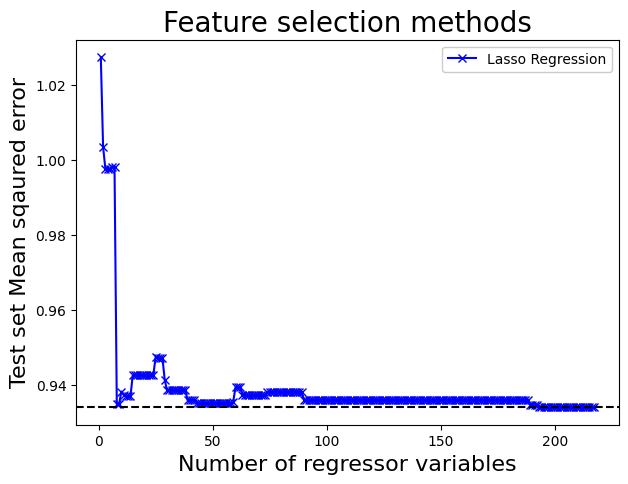

In [ ]:

fig,ax=plt.subplots(figsize=(7,5))#figure and axes object(s) with size (10,10)
plt.plot([1*i for i in range(1,218)], errorLasso,marker='x', color='blue',label='Lasso Regression')
plt.axhline(y=0.9341108828717, color='black', linestyle='--')
plt.title('Feature selection methods',fontsize=20)
plt.xlabel('Number of regressor variables',fontsize=16)
plt.ylabel('Test set Mean sqaured error',fontsize=16)
ax.grid(False)
ax.legend(facecolor='white',framealpha=1)

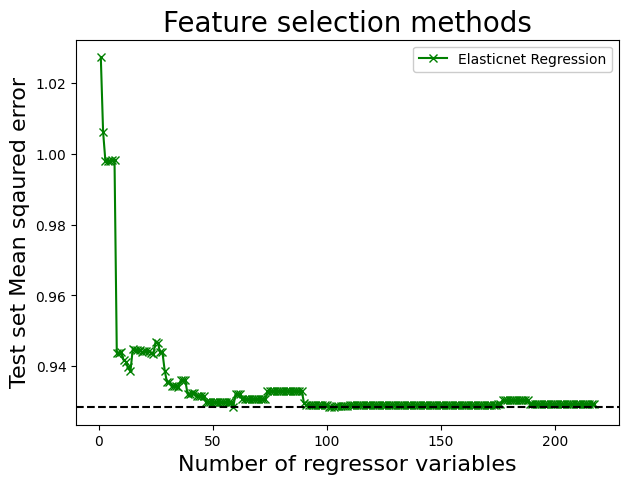

In [ ]:
fig,ax=plt.subplots(figsize=(7,5))#figure and axes object(s) with size (10,10)
plt.plot([1*i for i in range(1,218)], errorElasticNet,marker='x',color='green',label='Elasticnet Regression')
plt.title('Feature selection methods',fontsize=20)
plt.xlabel('Number of regressor variables',fontsize=16)
plt.ylabel('Test set Mean sqaured error',fontsize=16)
plt.axhline(y=0.9284024536956597, color='black', linestyle='--')
ax.legend(facecolor='white',framealpha=1)

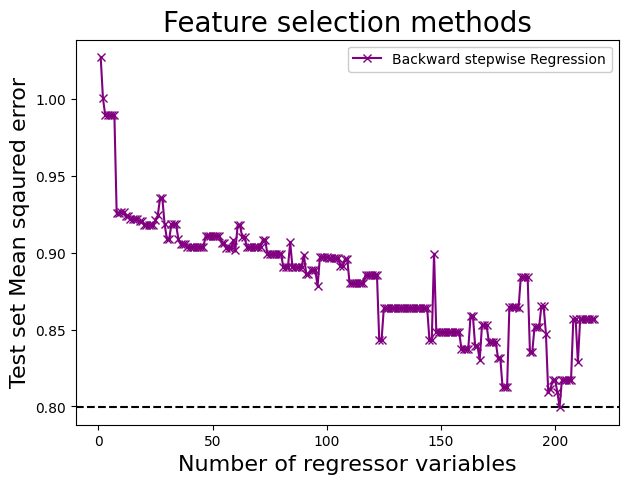

In [ ]:

fig,ax=plt.subplots(figsize=(7,5))#figure and axes object(s) with size (10,10)
plt.plot([1*i for i in range(1,218)], errorBackward,color='purple',marker='x',label='Backward stepwise Regression')
plt.axhline(y=0.7994979, color='black', linestyle='--')
plt.title('Feature selection methods',fontsize=20)
plt.xlabel('Number of regressor variables',fontsize=16)
plt.ylabel('Test set Mean sqaured error',fontsize=16)
ax.legend(facecolor='white',framealpha=1)

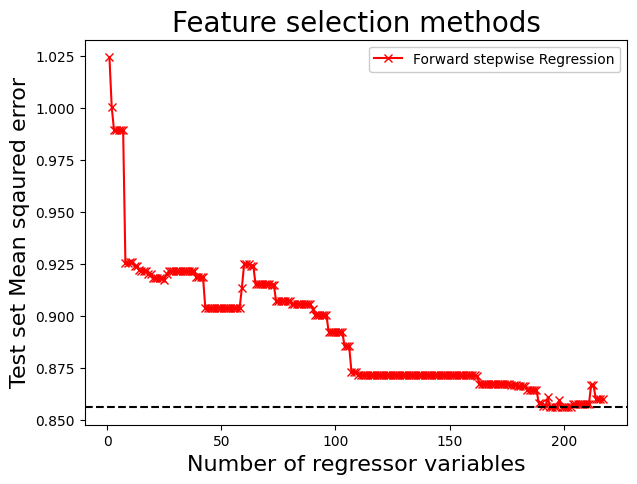

In [ ]:

fig,ax=plt.subplots(figsize=(7,5))#figure and axes object(s) with size (10,10)
plt.plot([1*i for i in range(1,218)], errorForward,color='red',marker='x',label='Forward stepwise Regression')
plt.axhline(y=0.8563241, color='black', linestyle='--')
plt.title('Feature selection methods',fontsize=20)
plt.xlabel('Number of regressor variables',fontsize=16)
plt.ylabel('Test set Mean sqaured error',fontsize=16)
ax.legend(facecolor='white',framealpha=1)

In [ ]:
lst=[1,2,3,4,5]
a=[2,2,3,1,4]
for x in list(set(a)):
    lst.remove(x)

print(lst)
0.8604486   2.0000000   3.0000000   4.0000000   5.0000000   6.0000000   7.0000000
  [8]   8.0000000   9.0000000  10.0000000  11.0000000  12.0000000  13.0000000  14.0000000
 [15]  15.0000000  16.0000000  17.0000000  18.0000000  19.0000000  20.0000000  21.0000000
 [22]  22.0000000  23.0000000  24.0000000  25.0000000  26.0000000  27.0000000  28.0000000
 [29]  29.0000000  30.0000000  31.0000000  32.0000000  33.0000000  34.0000000  35.0000000
 [36]  36.0000000  37.0000000  38.0000000  39.0000000  40.0000000  41.0000000  42.0000000
 [43]  43.0000000  44.0000000  45.0000000  46.0000000  47.0000000  48.0000000  49.0000000
 [50]  50.0000000  51.0000000  52.0000000  53.0000000  54.0000000  55.0000000  56.0000000
 [57]  57.0000000  58.0000000  59.0000000  60.0000000  61.0000000  62.0000000  63.0000000
 [64]  64.0000000  65.0000000  66.0000000  67.0000000  68.0000000  69.0000000  70.0000000
 [71]  71.0000000  72.0000000  73.0000000  74.0000000  75.0000000  76.0000000  77.0000000
 [78]  78.0000000  79.0000000  80.0000000  81.0000000  82.0000000  83.0000000  84.0000000
 [85]  85.0000000  86.0000000  87.0000000  88.0000000  89.0000000  90.0000000  91.0000000
 [92]  92.0000000  93.0000000  94.0000000  95.0000000  96.0000000  97.0000000  98.0000000
 [99]  99.0000000 100.0000000 101.0000000 102.0000000 103.0000000 104.0000000 105.0000000
[106] 106.0000000 107.0000000 108.0000000 109.0000000 110.0000000 111.0000000 112.0000000
[113] 113.0000000 114.0000000 115.0000000 116.0000000 117.0000000 118.0000000 119.0000000
[120] 120.0000000 121.0000000 122.0000000 123.0000000 124.0000000 125.0000000 126.0000000
[127] 127.0000000 128.0000000 129.0000000 130.0000000 131.0000000 132.0000000 133.0000000
[134] 134.0000000 135.0000000 136.0000000 137.0000000 138.0000000 139.0000000 140.0000000
[141] 141.0000000 142.0000000 143.0000000 144.0000000 145.0000000 146.0000000 147.0000000
[148] 148.0000000 149.0000000 150.0000000 151.0000000 152.0000000 153.0000000 154.0000000
[155] 155.0000000 156.0000000 157.0000000 158.0000000 159.0000000 160.0000000 161.0000000
[162] 162.0000000 163.0000000 164.0000000 165.0000000 166.0000000 167.0000000 168.0000000
[169] 169.0000000 170.0000000 171.0000000 172.0000000 173.0000000 174.0000000 175.0000000
[176] 176.0000000 177.0000000 178.0000000 179.0000000 180.0000000 181.0000000 182.0000000
[183] 183.0000000 184.0000000 185.0000000 186.0000000 187.0000000 188.0000000 189.0000000
[190] 190.0000000 191.0000000 192.0000000 193.0000000 194.0000000 195.0000000 196.0000000
[197] 197.0000000 198.0000000 199.0000000 200.0000000 201.0000000 202.0000000 203.0000000
[204] 204.0000000 205.0000000 206.0000000 207.0000000 208.0000000 209.0000000 210.0000000
[211] 211.0000000 212.0000000 213.0000000 214.0000000 215.0000000 216.0000000 217.0000000
[218] 218.0000000

0.8570497   2.0000000   3.0000000   4.0000000   5.0000000   6.0000000   7.0000000
  [8]   8.0000000   9.0000000  10.0000000  11.0000000  12.0000000  13.0000000  14.0000000
 [15]  15.0000000  16.0000000  17.0000000  18.0000000  19.0000000  20.0000000  21.0000000
 [22]  22.0000000  23.0000000  24.0000000  25.0000000  26.0000000  27.0000000  28.0000000
 [29]  29.0000000  30.0000000  31.0000000  32.0000000  33.0000000  34.0000000  35.0000000
 [36]  36.0000000  37.0000000  38.0000000  39.0000000  40.0000000  41.0000000  42.0000000
 [43]  43.0000000  44.0000000  45.0000000  46.0000000  47.0000000  48.0000000  49.0000000
 [50]  50.0000000  51.0000000  52.0000000  53.0000000  54.0000000  55.0000000  56.0000000
 [57]  57.0000000  58.0000000  59.0000000  60.0000000  61.0000000  62.0000000  63.0000000
 [64]  64.0000000  65.0000000  66.0000000  67.0000000  68.0000000  69.0000000  70.0000000
 [71]  71.0000000  72.0000000  73.0000000  74.0000000  75.0000000  76.0000000  77.0000000
 [78]  78.0000000  79.0000000  80.0000000  81.0000000  82.0000000  83.0000000  84.0000000
 [85]  85.0000000  86.0000000  87.0000000  88.0000000  89.0000000  90.0000000  91.0000000
 [92]  92.0000000  93.0000000  94.0000000  95.0000000  96.0000000  97.0000000  98.0000000
 [99]  99.0000000 100.0000000 101.0000000 102.0000000 103.0000000 104.0000000 105.0000000
[106] 106.0000000 107.0000000 108.0000000 109.0000000 110.0000000 111.0000000 112.0000000
[113] 113.0000000 114.0000000 115.0000000 116.0000000 117.0000000 118.0000000 119.0000000
[120] 120.0000000 121.0000000 122.0000000 123.0000000 124.0000000 125.0000000 126.0000000
[127] 127.0000000 128.0000000 129.0000000 130.0000000 131.0000000 132.0000000 133.0000000
[134] 134.0000000 135.0000000 136.0000000 137.0000000 138.0000000 139.0000000 140.0000000
[141] 141.0000000 142.0000000 143.0000000 144.0000000 145.0000000 146.0000000 147.0000000
[148] 148.0000000 149.0000000 150.0000000 151.0000000 152.0000000 153.0000000 154.0000000
[155] 155.0000000 156.0000000 157.0000000 158.0000000 159.0000000 160.0000000 161.0000000
[162] 162.0000000 163.0000000 164.0000000 165.0000000 166.0000000 167.0000000 168.0000000
[169] 169.0000000 170.0000000 171.0000000 172.0000000 173.0000000 174.0000000 175.0000000
[176] 176.0000000 177.0000000 178.0000000 179.0000000 180.0000000 181.0000000 182.0000000
[183] 183.0000000 184.0000000 185.0000000 186.0000000 187.0000000 188.0000000 189.0000000
[190] 190.0000000 191.0000000 192.0000000 193.0000000 194.0000000 195.0000000 196.0000000
[197] 197.0000000 198.0000000 199.0000000 200.0000000 201.0000000 202.0000000 203.0000000
[204] 204.0000000 205.0000000 206.0000000 207.0000000 208.0000000 209.0000000 210.0000000
[211] 211.0000000 212.0000000 213.0000000 214.0000000 215.0000000 216.0000000 217.0000000
[218] 218.0000000
> 

     

[5]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
reg=Ridge(alpha=995,fit_intercept=False)
LinearR=LinearRegression(fit_intercept=False)
lassoR=Lasso(alpha=0.07,fit_intercept=False)
elastic=ElasticNet(alpha=0.57,l1_ratio=0.08,fit_intercept=False)
errorRidge=[]
errorLinear=[]
errorLasso=[]
errorElasticNet=[]
for i in range(1,510):
    alpha=2*i
    FeatureVariable=xtrain.iloc[0:alpha,0:222]
    TargetVariable=ytrain[0:alpha]
    linears_regressor2 = reg.fit(FeatureVariable, TargetVariable)
    ridge_regressor2= LinearR.fit(FeatureVariable,TargetVariable)
    lasso_regressor2=lassoR.fit(FeatureVariable,TargetVariable)
    elas_regressor2=elastic.fit(FeatureVariable,TargetVariable)
    pred1=linears_regressor2.predict(xtest)
    pred2=ridge_regressor2.predict(xtest)
    pred3=lasso_regressor2.predict(xtest)
    pred4=elas_regressor2.predict(xtest)
    errorRidge.append(mean_squared_error(ytest, pred2))
    errorLinear.append(mean_squared_error(ytest,pred1))
    errorLasso.append(mean_squared_error(ytest,pred3))
    errorElasticNet.append(mean_squared_error(ytest,pred4))

In [ ]:
liner222=errorLinear[110:510]
ridge222=errorRidge[110:510]
linear22=errorLinear[0:109]
ridge22=errorRidge[0:109]
#print(errorRidge)

In [ ]:
print('The best parameters set for grid search is: {}'.format(randomsearch.best_params_))

The best parameters set for grid search is: {'alpha': 995}


In [ ]:
reg=Ridge(alpha=1.0,fit_intercept=False)
LinearR=LinearRegression(fit_intercept=False)
lassoR=Lasso(alpha=1.0,fit_intercept=False)
elastic=ElasticNet(alpha=1.0,l1_ratio=0.8,fit_intercept=False)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#penalty parameter choice 
penalty=[1*i for i in range(1,1001)]
classifier=['elasticnet']
solver=['saga']
l1_ratio=[i*0.01 for i in range(1,100)]
#create the grid
grid={'alpha':penalty}
#set up algorithm
gridsearch=GridSearchCV(estimator=elastic,param_grid=grid,cv=8,verbose=2,n_jobs=10,scoring='accuracy',return_train_score=True)
randomsearch=RandomizedSearchCV(estimator=reg,param_distributions=grid,cv=8,verbose=2,n_jobs=10,n_iter=200,return_train_score=True)
#train 

result=randomsearch.fit(xtrain,ytrain)
'randomsearch.fit(train_standardized,ytrain)'
'result2=randomsearch.fit(new_data,new_y)'

print('The best parameters set for grid search is: {}'.format(randomsearch.best_params_))

Fitting 8 folds for each of 200 candidates, totalling 1600 fits
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=341; total time=   0.0s
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=686; total time=   0.0s
[CV] END ..........................................alpha=341; total time=   0.0s
[CV] END ..........................................alpha=341; total time=   0.0s
[CV] END ..........................................alpha=341; total time=   0.0s
[CV] END ....................................

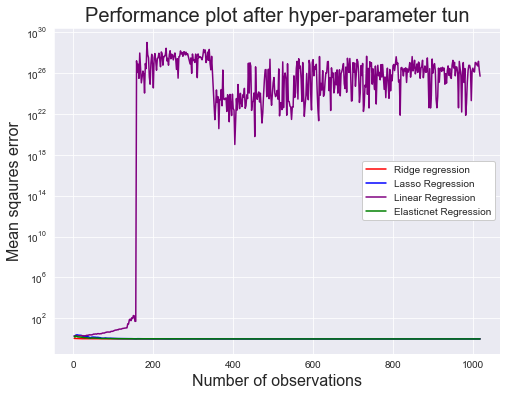

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))#figure and axes object(s) with size (10,10)
plt.plot([2*i for i in range(1,510)], errorLinear, color='red',label='Ridge regression')
plt.plot([2*i for i in range(1,510)], errorLasso, color='blue',label='Lasso Regression')
plt.plot([2*i for i in range(1,510)], errorRidge, color='purple',label='Linear Regression')
"plt.plot([2*i for i in range(1,510)], errorLasso, color='red',label='Lasso Regression')"
plt.plot([2*i for i in range(1,510)], errorElasticNet, color='green',label='Elasticnet Regression')
plt.yscale("log")
plt.title('Performance plot after hyper-parameter tun',fontsize=20)
plt.xlabel('Number of observations',fontsize=16)
plt.ylabel('Mean sqaures error',fontsize=16)
ax.legend(facecolor='white',framealpha=1)
#plt.vlines(x=11,colors='black',ymin=0.4,ymax=0.8,linestyles='--')

In [ ]:
print(max(errorRidge))
for i in range(len(errorRidge)):
    if errorRidge[i]>100:
        print(i)

print(errorRidge[0])

#73,74,75,76

542.2876057027097
73
74
75
26.752355856657054


In [ ]:
for i in range(len(errorRidge
                   )):
    if errorRidge[i]>10000:
        print(i)
        print(errorRidge[i])
    '''224,232'''
errorRidge[111]=3.8
errorRidge[115]=3.75

115
2.9893890781060733e+20


In [ ]:
a=list(xtrain.iloc[:,-1])

print(list(ytest))



[11.635151947212842, 12.513561021741964, 11.665655135642039, 12.301387370778713, 11.320565693461432, 12.001511614739405, 12.343470927093518, 11.763691965388299, 12.577639650232573, 12.988043102265232, 12.128116509451258, 11.736077016252437, 12.468440756144114, 12.669809806411457, 12.08954444723597, 12.328294703023394, 12.546113507028412, 12.411056299528171, 11.751950239425476, 11.715874472198905, 12.407383590534293, 11.755879486687116, 12.001511614739405, 12.128116509451258, 12.991755706536901, 12.116700301832573, 11.884495917930655, 11.863589378812122, 12.225880174775122, 11.771443882099637, 12.019749091416921, 11.674202123168433, 12.386312871189734, 11.901590234400047, 11.775297421715827, 12.388398368982115, 12.323860125621126, 12.439875187430008, 11.794345471549745, 11.940399914116648, 12.093693109638318, 11.864469267087891, 11.898194668458823, 12.09626335986454, 12.117246896289503, 12.138869243416009, 12.721888795877375, 11.421917019425596, 12.577639650232573, 11.896833207128452, 1

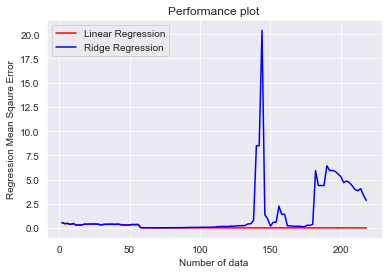

In [ ]:
plt.plot([2*i for i in range(1,110)], linear22, color='red',label='Linear Regression')
plt.plot([2*i for i in range(1,110)], ridge22, color='blue',label='Ridge Regression')

plt.title('Performance plot')
plt.xlabel('Number of data')
plt.ylabel('Regression Mean Sqaure Error')
plt.legend()
#plt.vlines(x=11,colors='black',ymin=0.4,ymax=0.8,linestyles='--')

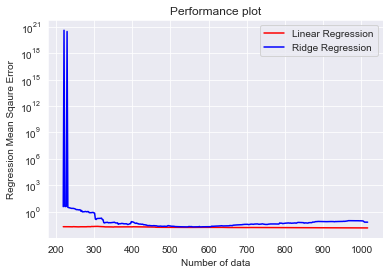

In [ ]:
plt.plot([2*i for i in range(110,509)], liner222, color='red',label='Linear Regression')
plt.plot([2*i for i in range(110,509)], ridge222, color='blue',label='Ridge Regression')
plt.yscale("log")
plt.title('Performance plot')
plt.xlabel('Number of data')
plt.ylabel('Regression Mean Sqaure Error')
plt.legend()
#plt.vlines(x=11,colors='black',ymin=0.4,ymax=0.8,linestyles='--')

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
# Simulations
# An appropriate value of k may be determined by inspection of the ridge trace
#plot B versys k for the values of k usually in the interval 0-1,25 values 
n=3000
p=100
mean=np.array([0 for i in range(p)])
var=np.eye(p)
for i in range(0,len(var[0])):
    var[i,i]=(i+1)/50
print(var)
X=np.random.multivariate_normal(mean,var,n)
print(np.shape(X))
var2=np.eye(p)
beta=[1 for i in range(p)]
eps=np.random.multivariate_normal(mean,var2,30)
eps2=np.reshape(eps,-1)
eps3=eps[0,0:300]
print('The shape of eps3 is equal to:',np.shape(eps3))
print(np.shape(np.dot(X,beta)))
Y=np.transpose(np.dot(X,beta)+eps2)
print(np.shape(Y))
lamb=[10*i for i in range(100000)]


[[0.02 0.   0.   ... 0.   0.   0.  ]
 [0.   0.04 0.   ... 0.   0.   0.  ]
 [0.   0.   0.06 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.96 0.   0.  ]
 [0.   0.   0.   ... 0.   1.98 0.  ]
 [0.   0.   0.   ... 0.   0.   2.  ]]
(3000, 100)
The shape of eps3 is equal to: (100,)
(3000,)
(3000,)


In [ ]:
"Compute the ridge estimator"
def ridge_beta(lamb,X,Y,p):
    a=np.linalg.inv(np.dot(np.transpose(X),X)+lamb*np.eye(p))
    b=np.dot(a,np.transpose(X))
    c=np.dot(b,Y)
    return c

In [ ]:
kss=[]
p=100
for i in range(len(lamb)):
    kss.append(np.absolute(ridge_beta(lamb[i],X,Y,p)))
print(np.shape(kss))
print(kss[1])


KeyboardInterrupt: 

In [ ]:
ks=np.array(kss)
ksss=np.transpose(ks)
print(np.shape(ksss))
print(ksss[1])

(100, 100000)
[1.03452419e+00 9.52846791e-01 8.83538898e-01 ... 1.59990181e-04
 1.59988582e-04 1.59986983e-04]


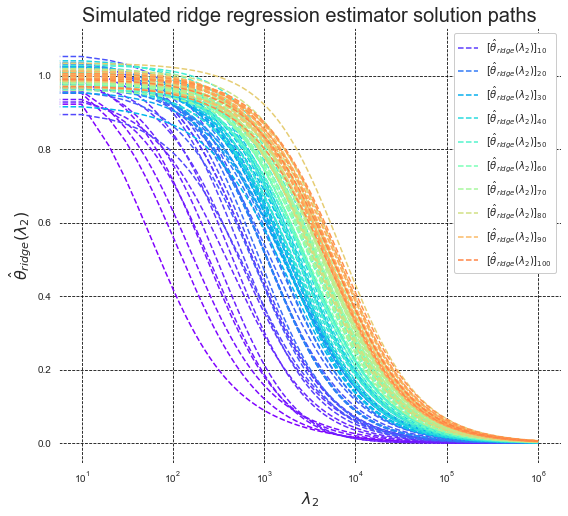

In [ ]:
fig,ax=plt.subplots(figsize=(9,8))#figure and axes object(s) with size (10,10)
cmap=plt.cm.rainbow#setting different color for each seires
p=100
# slow loop plot t=(1to10)
for t in range (p): 
    if t==9:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{10}$')
    if t==19:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{20}$')
    if t==29:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{30}$')
    if t==39:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{40}$')
    if t==49:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{50}$')
    if t==59:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{60}$')
    if t==69:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{70}$')
    if t==79:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{80}$')
    if t==89:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{90}$')
    if t==99:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{ridge}(\lambda_2)]_{100}$')

    else:
        ax.plot([10*i for i in range(100000)],ksss[t],'--',color=cmap(t/float(120)))
    
plt.xlabel(r'$\lambda_2$',fontsize=16)
plt.ylabel(r'$\hat{\theta}_{ridge}(\lambda_2)$',fontsize=16)
plt.title('Simulated ridge regression estimator solution paths',fontsize=20)
ax.set_xscale('log')
ax.set_facecolor("white")
ax.grid(b=True, which='major', color='black', linestyle='--')
ax.legend(facecolor='white',framealpha=1)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
def lasso_beta(lamb,X,Y,p):
    model = Lasso(alpha=lamb)
    model.fit(X,Y)
    coeffs=model.coef_
    return coeffs
def logistic_beta(lamb,X,Y,p):
    ridgec=LogisticRegression(penalty='l2',C=lamb)
    ridgec.fit(X,Y)
    coeffs=ridgec.coef_
    return coeffs
def lasso_beta(lamb,X,Y,p):
    ridgec=LogisticRegression(penalty='l2',C=lamb)
    ridgec.fit(X,Y)
    coeffs=ridgec.coef_
    return coeffs

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
# Simulations
# An appropriate value of k may be determined by inspection of the ridge trace
#plot B versys k for the values of k usually in the interval 0-1,25 values 
n=3000
p=100
mean=np.array([0 for i in range(p)])
var=np.eye(p)
for i in range(len(var[0])):
    for j in range(len(var[0])):
        if i==j:
            var[i,i]=(i+1)/50
        else:
            var[i,j]=np.random.uniform(0.7,1,1)
print(var)
X=np.random.multivariate_normal(mean,var,n)
print(np.shape(X))
var2=np.eye(p)
beta=[1 for i in range(p)]
eps=np.random.multivariate_normal(mean,var2,30)
eps2=np.reshape(eps,-1)
eps3=eps[0,0:300]
print('The shape of eps3 is equal to:',np.shape(eps3))
print(np.shape(np.dot(X,beta)))
Y=np.transpose(np.dot(X,beta)+eps2)
print(np.shape(Y))
lamb=[0.001*i for i in range(1000000)]

[[0.02       0.88626234 0.97079829 ... 0.90911772 0.82111972 0.72586943]
 [0.99210272 0.04       0.97679445 ... 0.76222199 0.74352607 0.91136114]
 [0.91345623 0.93142297 0.06       ... 0.78807616 0.75000936 0.76631045]
 ...
 [0.80146191 0.854435   0.70551323 ... 1.96       0.90010339 0.80269991]
 [0.99307942 0.84071992 0.71546746 ... 0.78799408 1.98       0.78252104]
 [0.7722105  0.8415111  0.87485578 ... 0.86755953 0.95850819 2.        ]]
(3000, 100)
The shape of eps3 is equal to: (100,)
(3000,)
(3000,)


In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
# Simulations
# An appropriate value of k may be determined by inspection of the ridge trace
#plot B versys k for the values of k usually in the interval 0-1,25 values 
n=3000
p=100
mean=np.array([0 for i in range(p)])
var=np.eye(p)
for i in range(0,len(var[0])):
    var[i,i]=(i+1)/50
print(var)
X=np.random.multivariate_normal(mean,var,n)
print(np.shape(X))
var2=np.eye(p)
beta=[1 for i in range(p)]
eps=np.random.multivariate_normal(mean,var2,30)
eps2=np.reshape(eps,-1)
eps3=eps[0,0:300]
print('The shape of eps3 is equal to:',np.shape(eps3))
print(np.shape(np.dot(X,beta)))
Y=np.transpose(np.dot(X,beta)+eps2)
print(np.shape(Y))
lamb=[0.0001*i for i in range(1000000)]

[[0.02 0.   0.   ... 0.   0.   0.  ]
 [0.   0.04 0.   ... 0.   0.   0.  ]
 [0.   0.   0.06 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.96 0.   0.  ]
 [0.   0.   0.   ... 0.   1.98 0.  ]
 [0.   0.   0.   ... 0.   0.   2.  ]]
(3000, 100)
The shape of eps3 is equal to: (100,)
(3000,)
(3000,)


In [ ]:
kss=[]
p=100
for i in range(len(lamb)):
    kss.append(lasso_beta(lamb[i],X,Y,p))
print(np.shape(kss))
print(kss[1])

ValueError: Unknown label type: 'continuous'

In [ ]:
ks=np.array(kss)
ksss=np.transpose(ks)
print(np.shape(ksss))
print(ksss[1])

(100, 1000000)
[1.0141487  1.01431909 1.01449167 ... 0.         0.         0.        ]


/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_92733/3826549218.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='black', linestyle='--')


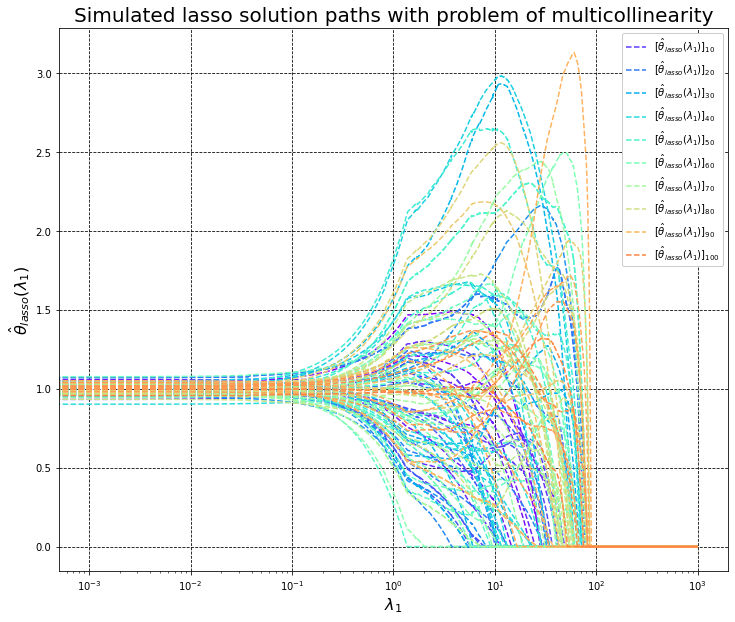

In [ ]:
fig,ax=plt.subplots(figsize=(12,10))#figure and axes object(s) with size (10,10)
cmap=plt.cm.rainbow#setting different color for each seires
p=100
# slow loop plot t=(1to10)
for t in range (p): 
    if t==9:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{10}$')
    if t==19:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{20}$')
    if t==29:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{30}$')
    if t==39:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{40}$')
    if t==49:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{50}$')
    if t==59:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{60}$')
    if t==69:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{70}$')
    if t==79:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{80}$')
    if t==89:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{90}$')
    if t==99:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{100}$')

    else:
        ax.plot([0.001*i for i in range(1000000)],ksss[t],'--',color=cmap(t/float(120)))
    
plt.xlabel(r'$\lambda_1$',fontsize=16)
plt.ylabel(r'$\hat{\theta}_{lasso}(\lambda_1)$',fontsize=16)
plt.title('Simulated lasso solution paths with problem of multicollinearity',fontsize=20)
ax.set_xscale('log')
ax.set_facecolor("white")
ax.grid(b=True, which='major', color='black', linestyle='--')
ax.legend(facecolor='white',framealpha=1)
plt.show()

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
# Simulations
# An appropriate value of k may be determined by inspection of the ridge trace
#plot B versys k for the values of k usually in the interval 0-1,25 values 
n=3000
p=100
beta=[1 for i in range(p)]
mean=np.array([0 for i in range(p)])
var=np.eye(p)
for i in range(0,len(var[0])):
    var[i,i]=(i+1)/50
print(var)
X=np.random.multivariate_normal(mean,var,n)
p2=np.exp(np.dot(X,beta))/(1+np.exp(np.dot(X,beta)))
Y=[]
for i in range(len(p2)):
    if p2[i]<0.5:
        Y.append(0)
    else:
        Y.append(1)
print(Y)
lamb=[10000/i for i in range(1,1000000)]

[[0.02 0.   0.   ... 0.   0.   0.  ]
 [0.   0.04 0.   ... 0.   0.   0.  ]
 [0.   0.   0.06 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.96 0.   0.  ]
 [0.   0.   0.   ... 0.   1.98 0.  ]
 [0.   0.   0.   ... 0.   0.   2.  ]]
[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
# Simulations
# An appropriate value of k may be determined by inspection of the ridge trace
#plot B versys k for the values of k usually in the interval 0-1,25 values 
n=3000
p=100
beta=[1 for i in range(p)]
mean=np.array([0 for i in range(p)])
var=np.eye(p)
for i in range(len(var[0])):
    for j in range(len(var[0])):
        if i==j:
            var[i,i]=(i+1)/50
        else:
            var[i,j]=np.random.uniform(0.7,1,1)
print(var)
X=np.random.multivariate_normal(mean,var,n)
p2=np.exp(np.dot(X,beta))/(1+np.exp(np.dot(X,beta)))
Y=[]
for i in range(len(p2)):
    if p2[i]<0.5:
        Y.append(0)
    else:
        Y.append(1)
print(Y)
lamb=[10000/i for i in range(1,1000000)]

[[0.02       0.73273804 0.97378668 ... 0.91201143 0.83689973 0.90129992]
 [0.80339824 0.04       0.77448225 ... 0.93426247 0.72244691 0.74718828]
 [0.89588456 0.81735593 0.06       ... 0.99070158 0.76497374 0.73929119]
 ...
 [0.80001852 0.90657195 0.72305307 ... 1.96       0.78905853 0.98818896]
 [0.98458365 0.92458661 0.94560172 ... 0.87526078 1.98       0.82280159]
 [0.90493956 0.79704222 0.9779845  ... 0.90829566 0.8367235  2.        ]]
[1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 

/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_914/3077997681.py:18: RuntimeWarning: covariance is not positive-semidefinite.
  X=np.random.multivariate_normal(mean,var,n)


In [ ]:
kss=[]
p=100
for i in range(len(lamb)):
    kss.append(logistic_beta(lamb[i],X,Y,p))
print(np.shape(kss))
print(kss[1])

(999999, 1, 100)
[[2.20351155 2.70269336 2.48167123 0.83851934 3.24372873 1.58447016
  1.15307883 1.39822381 3.7445202  2.55595525 2.10525056 3.52614486
  3.09972889 3.09311943 2.92408061 4.51610104 3.90331839 2.76987886
  3.78132355 2.97687413 4.37036078 2.6469522  3.13332769 4.63247594
  2.84174913 3.33037279 3.51533768 3.2662103  2.56524124 4.32391998
  0.73882571 2.17015743 0.64882469 2.07975479 3.95879423 2.27389576
  4.11131209 1.37908566 2.58698276 4.10367266 4.04702497 1.29931127
  3.00974594 3.27843773 1.7385324  2.64231235 2.70495995 4.52655365
  4.11927742 4.38403401 1.70060025 2.36795155 3.22649046 2.05682866
  1.11398092 4.93789958 6.06426061 1.60440085 1.89630196 5.32466029
  2.90062565 2.38570976 3.8982899  0.42825806 2.74297634 3.37310018
  2.74110917 3.07190348 2.09840162 3.39629797 3.80658672 4.12888012
  2.09288276 2.5167133  3.30348175 2.33723062 4.22767789 2.78850191
  4.44271721 3.62018036 5.35208393 2.41965322 2.68856561 2.6871478
  2.18203197 4.06179426 1.669653

In [ ]:
ks=np.array(kss)
ksss=np.transpose(ks)
print(np.shape(ksss))
print(ksss[4][0])

(100, 1, 999999)
[3.4662926  3.24372873 3.10608599 ... 0.14234405 0.142344   0.14234394]


/var/folders/34/w7yprsg16gs0572zm5qy8f380000gn/T/ipykernel_914/453571317.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='black', linestyle='--')


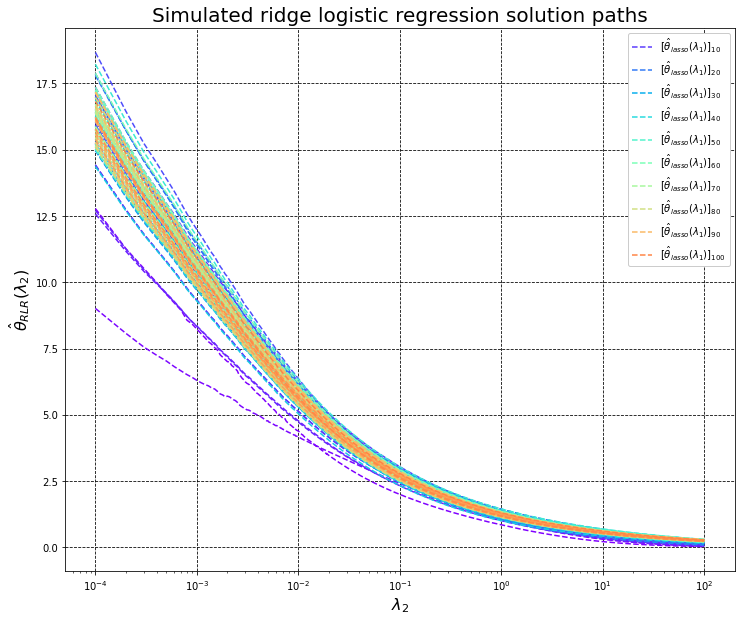

In [ ]:
fig,ax=plt.subplots(figsize=(12,10))#figure and axes object(s) with size (10,10)
cmap=plt.cm.rainbow#setting different color for each seires
p=100
# slow loop plot t=(1to10)
for t in range (p): 
    if t==9:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{10}$')
    if t==19:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{20}$')
    if t==29:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{30}$')
    if t==39:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{40}$')
    if t==49:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{50}$')
    if t==59:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{60}$')
    if t==69:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{70}$')
    if t==79:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{80}$')
    if t==89:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{90}$')
    if t==99:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)),label=r'$[\hat{\theta}_{lasso}(\lambda_1)]_{100}$')

    else:
        ax.plot([i/10000 for i in range(1,1000000)],ksss[t][0],'--',color=cmap(t/float(120)))
    
plt.xlabel(r'$\lambda_2$',fontsize=16)
plt.ylabel(r'$\hat{\theta}_{RLR}(\lambda_2)$',fontsize=16)
plt.title('Simulated ridge logistic regression solution paths',fontsize=20)
ax.set_xscale('log')
ax.set_facecolor("white")
ax.grid(b=True, which='major', color='black', linestyle='--')
ax.legend(facecolor='white',framealpha=1)
plt.show()